# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: David Danialy
### Preferred Name (if different): Chosen Name
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu

##  <u>References and sources </u>

Plot code source: https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [67]:
import pandas as pd
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt

In [68]:
np.random.seed(24)

#### Code the solution

In [69]:
def sortKey(arr):
    return arr[0]

In [70]:
def euclideanDistance(x, y):
    sum = 0

    #For each dimension in the data points
    for dimension in range(len(x)):
        #Sum the squared difference between the two points
        sum += (x[dimension] - y[dimension])**2 

    #Return the square root of the sum    
    return sum**.5 

In [71]:
def knn(x, data, k=3):

    #Convert the dataframe to a numpy array
    data = data.to_numpy()

    #Create an array which records distances between x and each data point, returned by distance function
    distances = []

    #For each entry in data, calculate Euclidean distance between x and that entry
    count = 0
    for point in data:
        distances.append([euclideanDistance(x, point), point[len(point) - 1]])
        count += 1

    #Sort the array according to distances
    distances.sort(key=sortKey)

    #Select the classification which has the majority between the k nearest neighbors to x
    distances = np.array(distances[0:k])

    #Get the column with the classifications
    distances = distances[:,1]

    #Return the mode of the classifications of the 3 nearest points
    return mode(distances)


Accuracy on 2d test dataset:  0.95
[[-3.829485684100497, 1.002739008380571, 0.0], [1.1081860120498885, 0.8262023349433257, 1.0], [-3.7189031252814533, 0.1322099853466142, 0.0], [2.1609548210602014, -0.16226000890266468, 1.0], [-2.0374341596122796, -0.5043458709975351, 0.0], [1.6603583363223415, 1.8426112186273857, 1.0], [-1.5492317014071306, 1.38814214083999, 0.0], [4.840144524454641, 0.5636049391317942, 1.0], [0.456491225933056, 0.48369351016118173, 0.0], [2.0648181038577396, -0.24957800106571285, 1.0], [-3.3308494747289252, -0.8539997533293233, 0.0], [5.874647236762696, 0.010068004378462102, 1.0], [-1.8790404750068954, 0.9459527077682074, 0.0], [-3.740192202791027, 0.3517101159912871, 0.0], [-1.4690206429657406, 0.10571221408927205, 0.0], [0.8446035537058667, -0.4053820254616016, 1.0], [0.18057185528564013, 1.4272715296416023, 0.0], [3.3859617365713897, 0.1852004391428304, 1.0], [-1.7851377744067172, -0.21321305948855895, 0.0], [-0.2629693736823606, 0.3111572482040415, 1.0]]


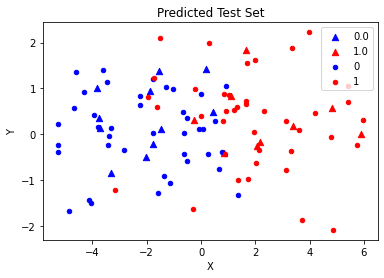

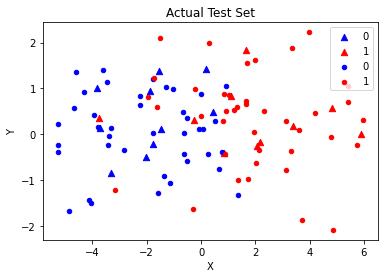

In [72]:
#Testing with 2d values
train = []
test = []
for i in range(40):
    train.append([np.random.normal(-2, 2), np.random.normal(0, 1), 0])
    train.append([np.random.normal(2, 2), np.random.normal(0, 1), 1])
for i in range(10):
    test.append([np.random.normal(-2, 2), np.random.normal(0, 1), 0])
    test.append([np.random.normal(2, 2), np.random.normal(0, 1), 1])
df = pd.DataFrame(train, columns = ['X', 'Y', 'Label'])
count = 0
predicted = []
for point in test:
    pred = knn(point, df)
    if (pred == point[len(point) - 1]):
        count += 1
    temp = point[:len(point) - 1]
    temp.append(pred)
    predicted.append(temp)
    
    
print("Accuracy on 2d test dataset: ", str(count / len(test)))

predicted = pd.DataFrame(predicted, columns = ['X', 'Y', 'Label'])
#Plot code source: https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
def plotScatter(data, title):
    groups = data.groupby('Label')
    colors = {0: 'blue', 1: 'red'}
    fig, ax = plt.subplots()
    for key, group in groups:
        group.plot(ax=ax, kind='scatter', x='X', y='Y', label=key, color=colors[key], marker='^', s=40)
    plt.title(title)
    groups = df.groupby('Label')
    for key, group in groups:
        group.plot(ax=ax, kind='scatter', x='X', y='Y', label=key, color=colors[key])
    plt.show()

plotScatter(predicted, 'Predicted Test Set')
plotScatter(pd.DataFrame(test, columns = ['X', 'Y', 'Label']), 'Actual Test Set') 

In [73]:
#Testing with 3d values
train = []
test = []
for i in range(200):
    train.append([np.random.normal(0, 3), np.random.normal(-3, 1), np.random.normal(-1, 1), 0])
    train.append([np.random.normal(0, 3), np.random.normal(1, 2), np.random.normal(1, 1), 1])
    train.append([np.random.normal(0, 3), np.random.normal(3, 1), np.random.normal(4, 1), 2])
    train.append([np.random.normal(0, 3), np.random.normal(5, 3), np.random.normal(-3, 1), 3])
for i in range(50):
    test.append([np.random.normal(0, 3), np.random.normal(-3, 1), np.random.normal(-1, 1), 0])
    test.append([np.random.normal(0, 3), np.random.normal(1, 2), np.random.normal(1, 1), 1])
    test.append([np.random.normal(0, 3), np.random.normal(3, 1), np.random.normal(4, 1), 2])
    test.append([np.random.normal(0, 3), np.random.normal(5, 3), np.random.normal(-3, 1), 3])
df = pd.DataFrame(train, columns = ['X', 'Y', 'Z', 'Label'])
count = 0
predicted = []
for point in test:
    pred = knn(point, df)
    if (pred == point[len(point) - 1]):
        count += 1

print("Accuracy on 3d test dataset: ", str(count / len(test)))

Accuracy on 3d test dataset:  0.98
